In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy.spatial.distance import hamming

In [2]:
def detect_orb_descriptors(img1, img2):
    orb = cv.ORB_create()
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    print(f"Keypoints: {len(kp1)}, descriptors: {des1.shape}")
    print(f"Keypoints: {len(kp2)}, descriptors: {des2.shape}") 
    return kp1, kp2, des1, des2

In [3]:
def bf_match(img1, img2, kp1, kp2, des1, des2):
    bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key = lambda x: x.distance)

    fig = plt.figure(figsize=(25, 25))
    ax = fig.add_subplot()
    ax.axis('off') 
    img3 = cv.drawMatches(img1, kp1, img2, kp2, matches[:10], None, 
                          flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.imshow(img3)
    plt.show()

In [4]:
def my_match(img1, img2, kp1, kp2, des1, des2):
    matches = []
    for i, k1 in enumerate(des1):
        for j, k2 in enumerate(des2):
            matches.append(cv.DMatch(_distance = hamming(k1, k2) * len(k1),
                                     _imgIdx = 0, _queryIdx = i, _trainIdx = j))
    matches = sorted(matches, key = lambda x: x.distance)

    fig = plt.figure(figsize=(25, 25))
    ax = fig.add_subplot()
    ax.axis('off')
    img3 = cv.drawMatches(img1, kp1, img2, kp2, matches[:10], None,
                          flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.imshow(img3)
    plt.show()

In [5]:
img_1 = cv.cvtColor(cv.imread("image1_1.jpg"), cv.COLOR_BGR2RGB)
img_2 = cv.cvtColor(cv.imread("image1_2.jpg"), cv.COLOR_BGR2RGB)

In [6]:
kp1, kp2, des1, des2 = detect_orb_descriptors(img_1, img_2)

Keypoints: 500, descriptors: (500, 32)
Keypoints: 500, descriptors: (500, 32)


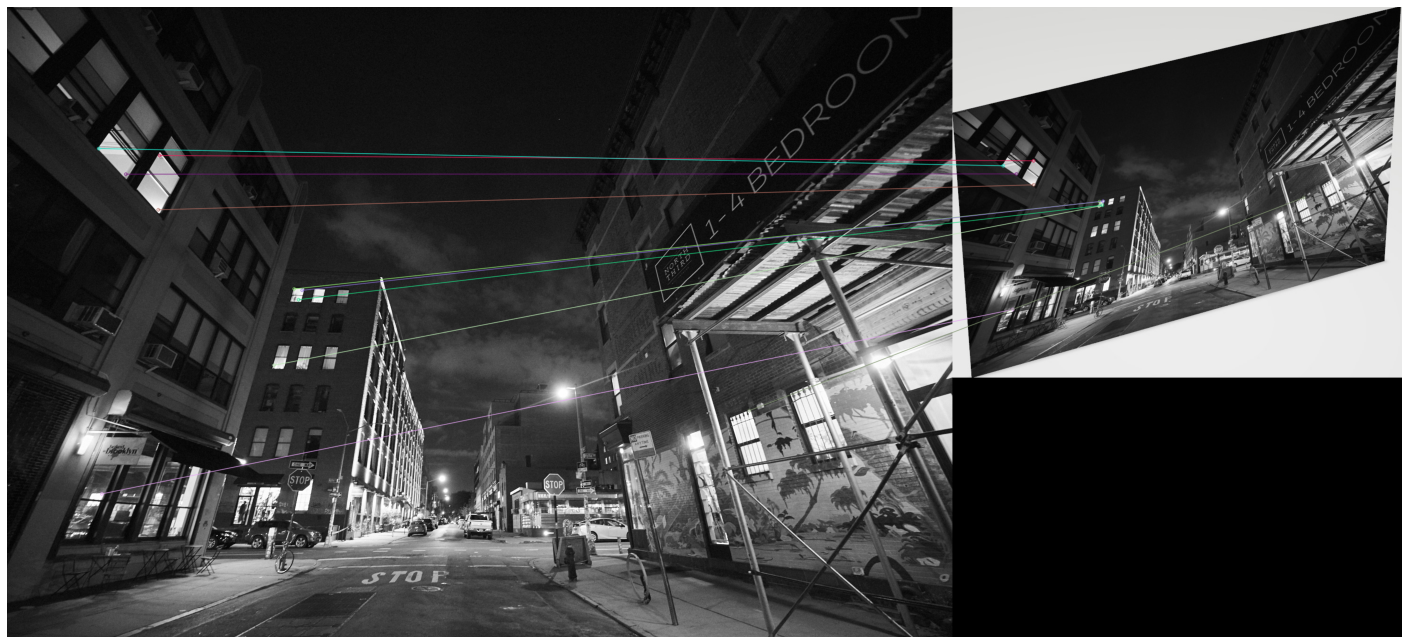

In [7]:
bf_match(img_1, img_2, kp1, kp2, des1, des2)

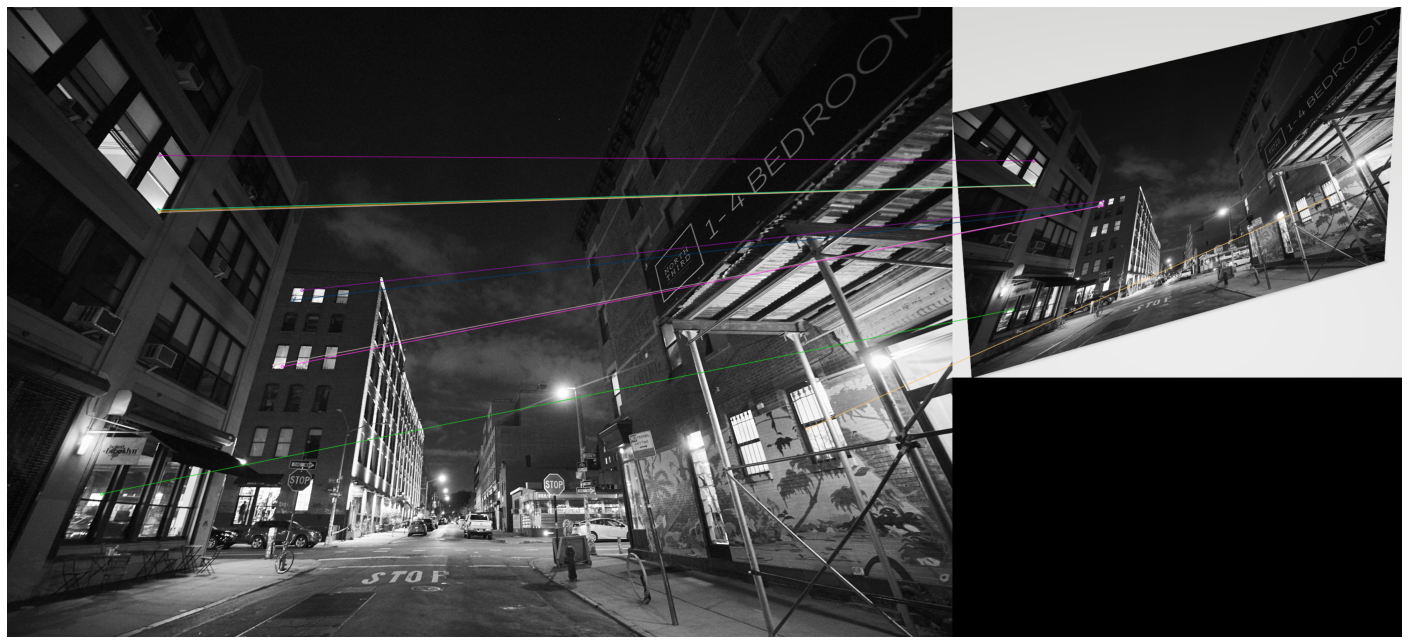

In [8]:
my_match(img_1, img_2, kp1, kp2, des1, des2)

In [9]:
img_1 = cv.cvtColor(cv.imread("image2_1.jpg"), cv.COLOR_RGB2GRAY)
img_2 = cv.cvtColor(cv.imread("image2_2.jpg"), cv.COLOR_RGB2GRAY)

In [10]:
kp1, kp2, des1, des2 = detect_orb_descriptors(img_1, img_2)

Keypoints: 500, descriptors: (500, 32)
Keypoints: 500, descriptors: (500, 32)


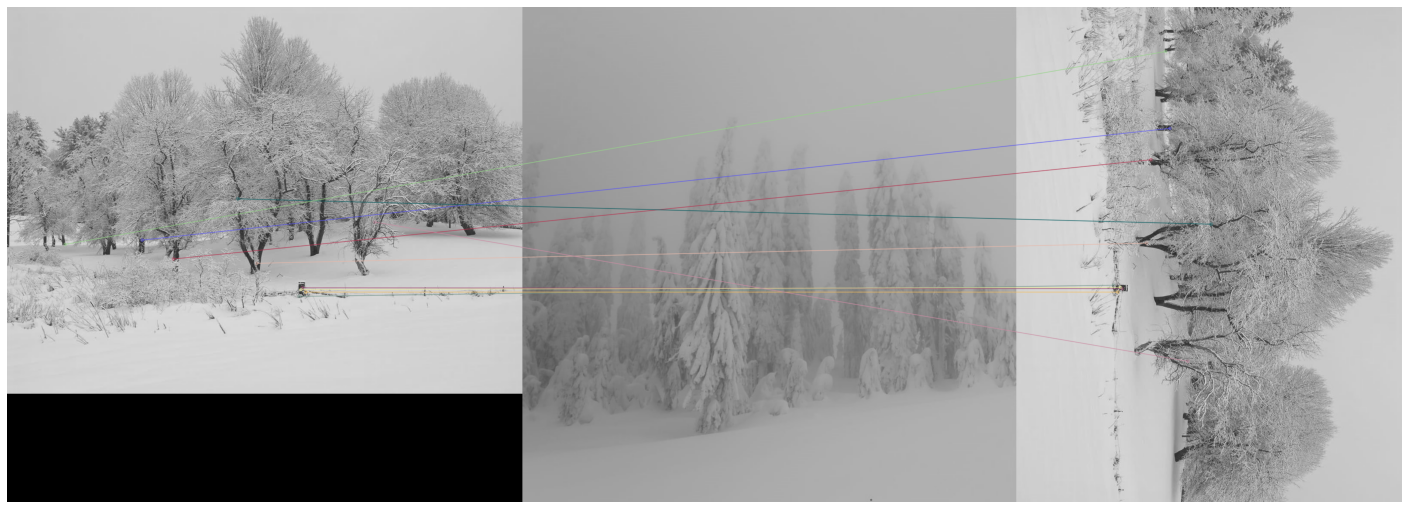

In [11]:
bf_match(img_1, img_2, kp1, kp2, des1, des2)

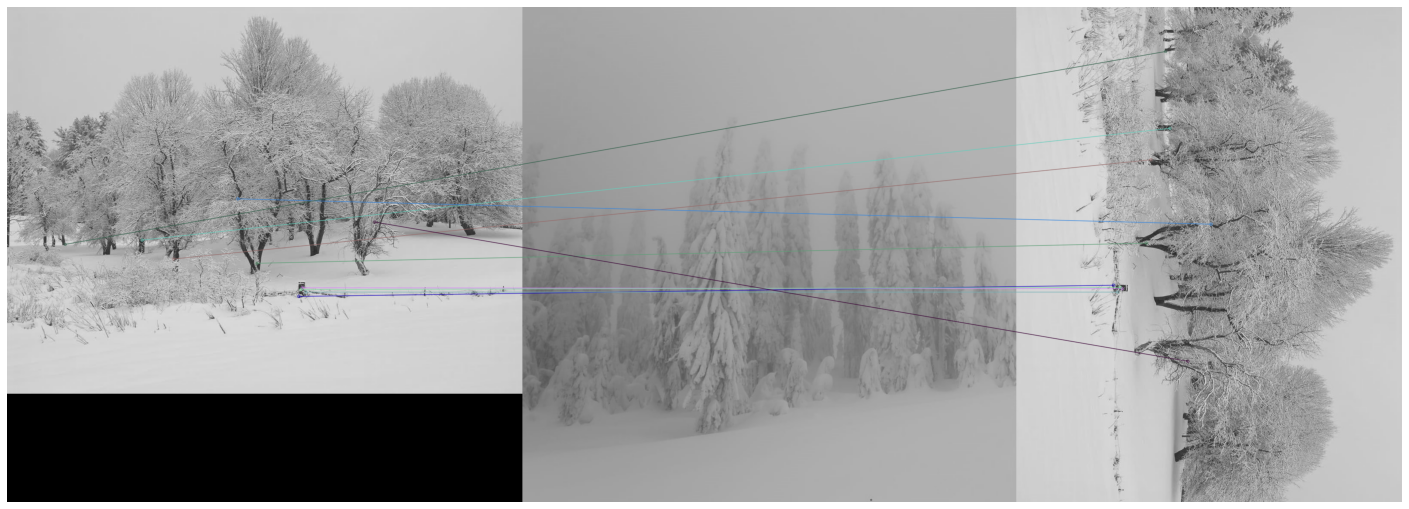

In [12]:
my_match(img_1, img_2, kp1, kp2, des1, des2)